# Steps:

1. Import the libraries
2. First look at the data
3. Data cleanup
4. EDA <br />
    4.1. Box plots <br />
    4.2. Pair plots <br />
    4.3. Heatmap analysis <br />
5. Principal component analysis <br />
    5.1. Split the data <br />
    5.2. Find the eigen vectors and eigen values <br />
    5.3. Find explained variance <br />
    5.4. Build a new model with the result of PCA <br />
6. Treat outliers <br />
7. Model building - Support vector machines (Only requested model) <br />
8. Hyper parameter tuning <br />

# Import the libs

In [1]:
# Linear algebra libs
import numpy as np
import pandas as pd

# Visualization libs
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# First look at the data

In [3]:
file_name = "vehicle.csv"
vehicle_data = pd.read_csv(file_name)
vehicle_data.shape

(846, 19)

In [4]:
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [5]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
vehicle_data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

#### Observations

1. All columns other than compactness, max.length_aspect_ratio, max.length_rectangularity, hollows_ratio, class have null values
2. Very high standard deviation scaled_variance.1 and is slightly right skewed
3. Scatter ratio is slightly right skewed
4. Rest of the distributions appear normal

# Data cleanup

In [7]:
for x in vehicle_data.columns[:-1]:
    vehicle_data[x].fillna(vehicle_data[x].mean(), inplace=True)

In [8]:
vehicle_data.isna().sum().sum()

0

In [9]:
# Storing the column list for later use
cols = vehicle_data.columns[:-1]
cols

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [10]:
# Scale the data using zscore

from scipy.stats import zscore

vehicle_scaled_data = vehicle_data[cols].apply(zscore)

In [11]:
vehicle_scaled_data['class'] = vehicle_data['class']

# EDA

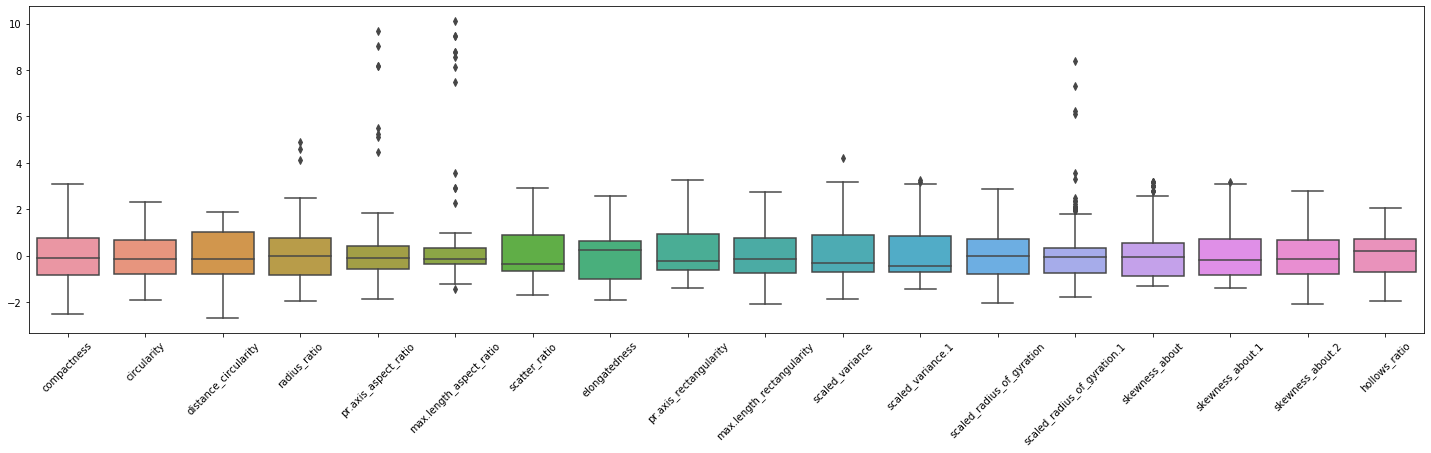

In [12]:
plt.figure(figsize=(25, 6))
ax = sns.boxplot(data=vehicle_scaled_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observations

1. We can see several outliers for radius_outliers, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration and scaled_radius_of_gyration.1, skewness_about.1
2. We can perform the outliers treatment after PCA.

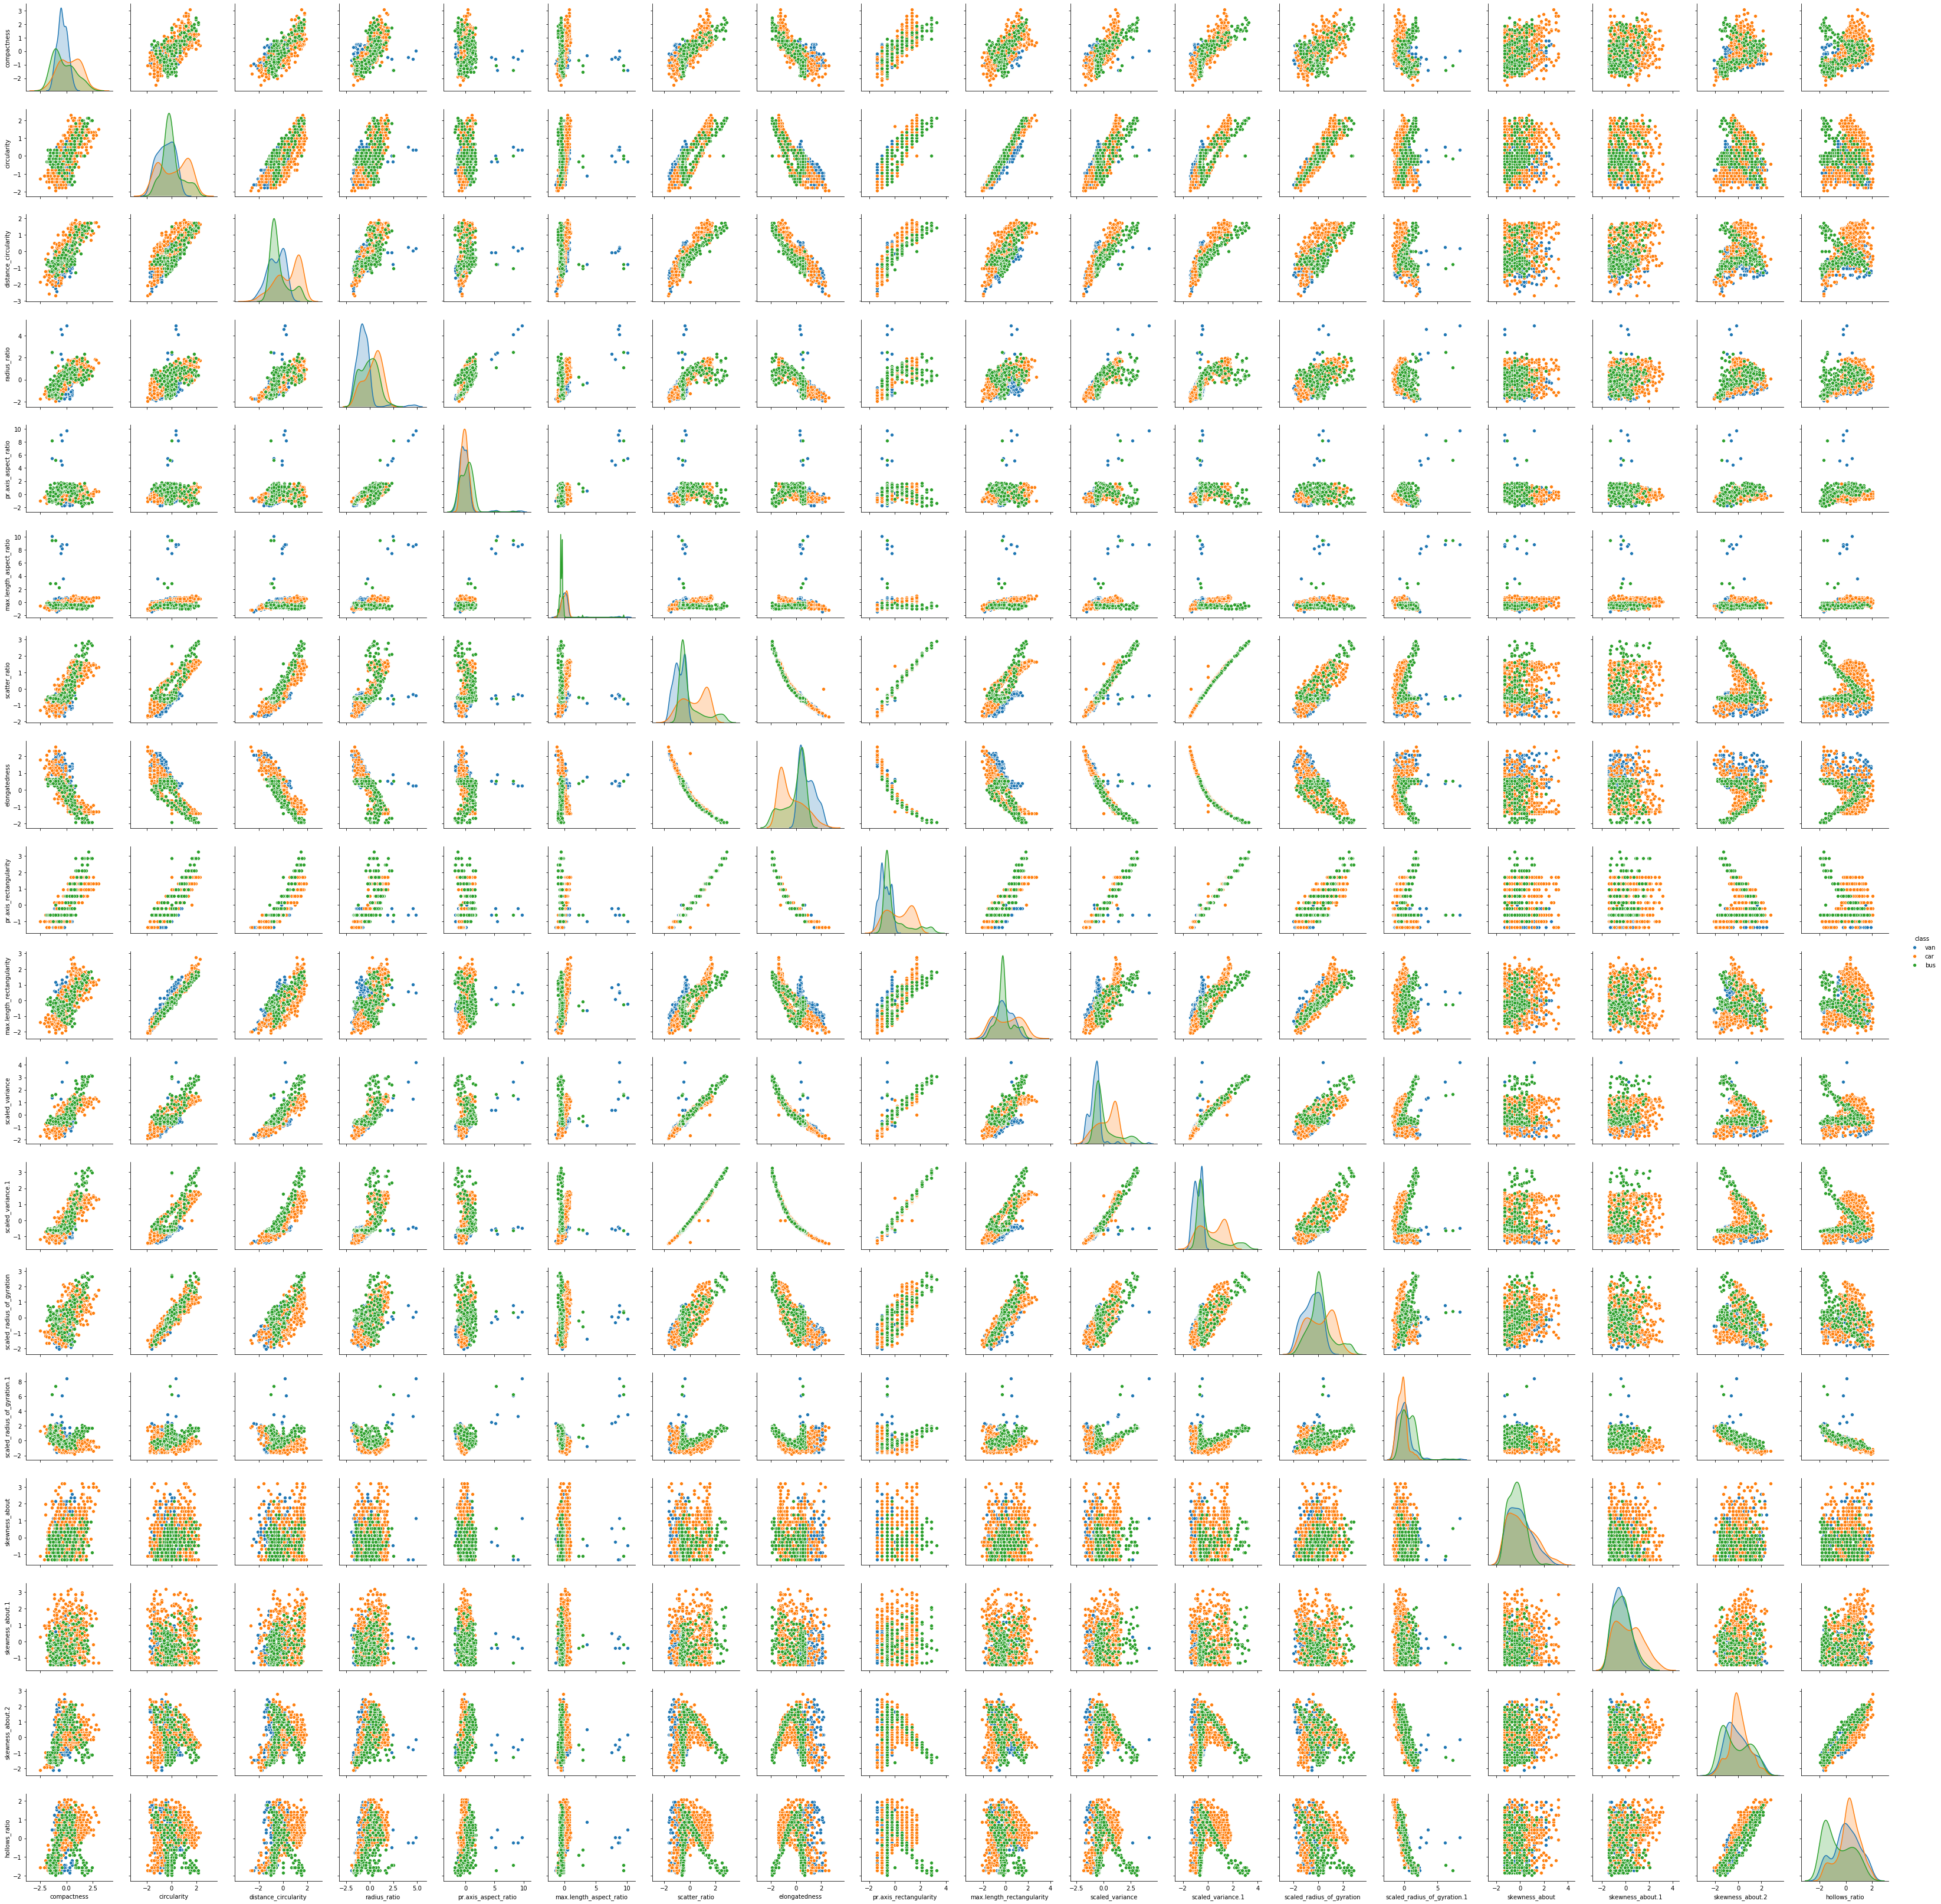

In [13]:
sns.pairplot(data=vehicle_scaled_data, hue='class')

### Observations

<b>Diagonal analysis</b>

1. compactness: Near normal for all classes
2. circularity: class car shows 2 gaussians
3. distance_circularity: 2 gaussians for all classes
4. radius_ratio: long right tail
5. pr.axis_aspect_ratio: long right tail
6. max.length_aspect_ratio: long right tail
7. scatter_ratio: 2 gaussians for all three classes and left skewness for van
8. elongatedness: normal of bus, multiple gaussian for van, left skewness for car
9. pr.axis_rectangularity: Left skew with multiple gaussians
10. max.length_rectangularity: Near normal
11. scaled_variance: long right tail
12. scaled_variance.1: left skewness
13. scaled_radius_of_gyration: Near normal
14. scaled_radius_of_gyration.1: long right tails
15. skewness_about: normal
16. skewness_about.1: normal
17. skewness_about.2: normal
18. hollows_ratio: normal

<b>Off diagonal analysis</b>
1. Skewness_about, skewness_about.1, skewness_about.2 appear as cloud with all other features
2. Rest of the features appear to be correlated with other features
3. max.length_rectangularity and pr.axis_rectangularity appear as cloud of classes other than van. van appears as low density cloud.
4. Some attributes like scatter ration appear to have very high correlation with other features

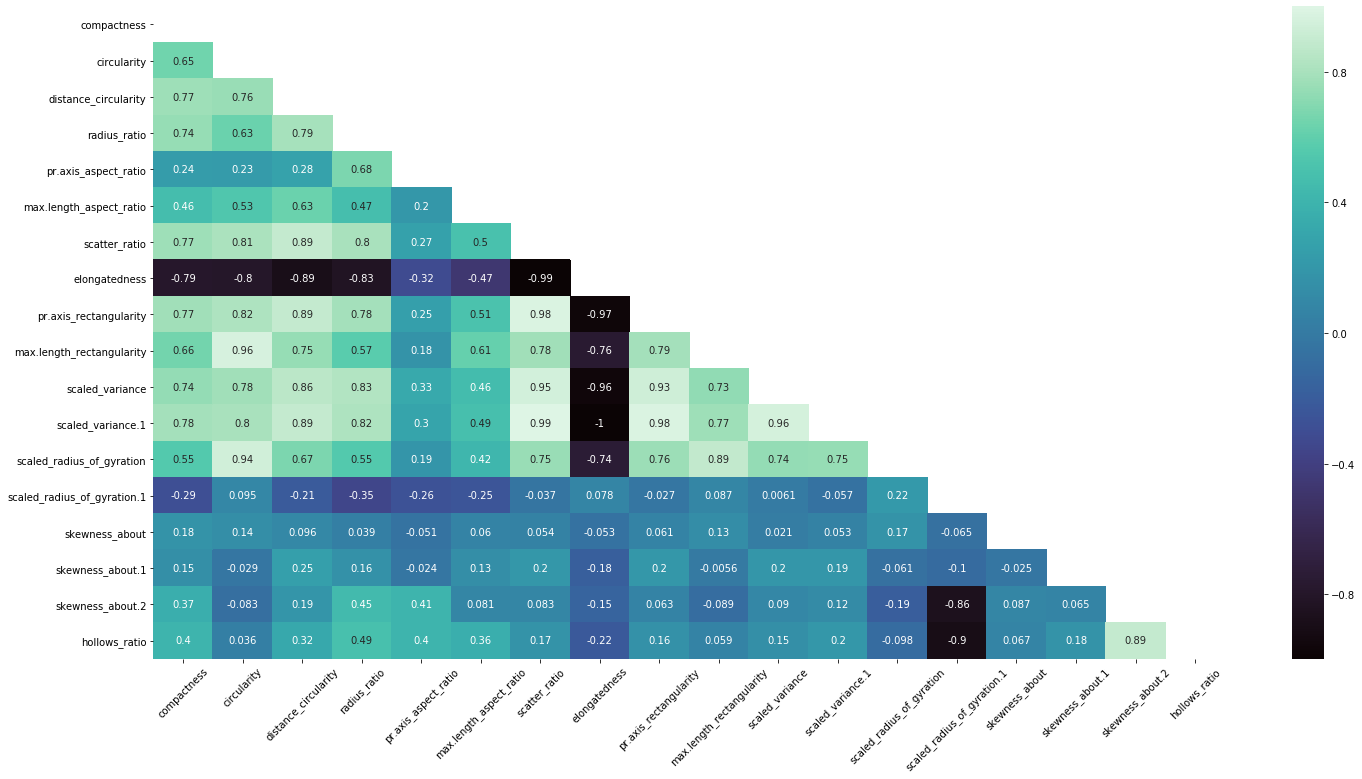

In [14]:
plt.subplots(figsize=(24, 12))
corr = vehicle_scaled_data.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data=corr, cmap='mako', annot=True, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Observations

Very high correlation is seen between different features. This can be seen from the sharp distributions on pair plot and also from the correlation matrix above.

This provides us an opportunity to reduce the number of features with Principle component analysis

# Principal component analysis

## Split the data

In [15]:
X = vehicle_scaled_data.drop('class', axis=1)
y = vehicle_scaled_data['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

## Find eigen vector and eigen values

In [16]:
# Build covariance matrix and extract eigen vectors and eigen values

cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.04582113  0.71360777  0.81120479  0.71864613  0.11279569  0.1541004
   0.83768617 -0.81362825  0.83902721  0.71221722  0.78948168  0.84102648
   0.62229668 -0.25273951  0.22531445  0.16067314  0.29796973  0.37083024]
 [ 0.71360777  1.00897888  0.80810152  0.65735758  0.18135655  0.25086052
   0.86069333 -0.83688722  0.85423061  0.96953268  0.81583492  0.85156654
   0.94100758  0.0446291   0.12629725  0.01347192 -0.09022066  0.06407733]
 [ 0.81120479  0.80810152  1.00977     0.78483246  0.17880551  0.27628895
   0.91271864 -0.91959328  0.90334891  0.79938637  0.87504481  0.89690116
   0.73372313 -0.21392571  0.09712095  0.26241097  0.13219296  0.32450011]
 [ 0.71864613  0.65735758  0.78483246  1.05825041  0.73713957  0.52642056
   0.75479333 -0.81034148  0.72996057  0.61975096  0.83224532  0.74078677
   0.57528948 -0.14647923  0.03053565  0.17619096  0.37763843  0.47774324]
 [ 0.11279569  0.18135655  0.17880551  0.73713957  1.09769698  0.77899336
   0.11579138

In [17]:
# the "cumulative variance explained" analysis 

tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [18]:
ex_var_df = pd.DataFrame(cum_var_exp, columns=['explained_variance'], index=X_train.columns)
ex_var_df

explained_variance
compactness                           51.824325
circularity                           68.070275
distance_circularity                  79.965056
radius_ratio                          86.193935
pr.axis_aspect_ratio                  91.266451
max.length_aspect_ratio               94.131303
scatter_ratio                         96.114158
elongatedness                         97.347558
pr.axis_rectangularity                98.207501
max.length_rectangularity             98.714864
scaled_variance                       99.110190
scaled_variance.1                     99.365787
scaled_radius_of_gyration             99.567784
scaled_radius_of_gyration.1           99.714826
skewness_about                        99.828295
skewness_about.1                      99.922745
skewness_about.2                      99.977353
hollows_ratio                        100.000000

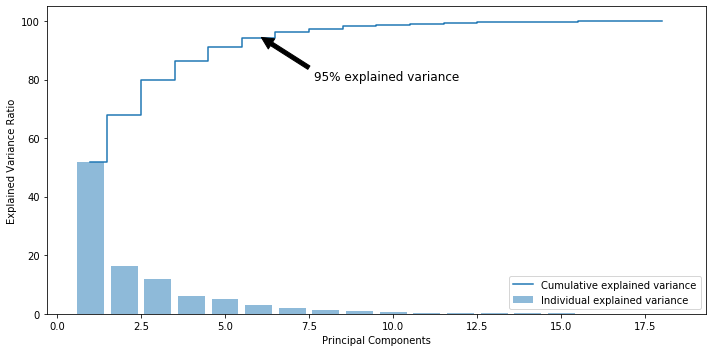

In [19]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()

plt.annotate('95% explained variance', xy=(6, 95), xytext=(55, -45),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='black')

plt.show()

In [20]:
# Build a new dataframe with the results of PCA
pca_df = vehicle_scaled_data[np.append(
    np.array(ex_var_df[ex_var_df['explained_variance'] <= 95].index), ['class'])]

In [21]:
pca_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [22]:
pca_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'class'],
      dtype='object')

#### Observations

1. Above analysis suggest that 95% variance in the data can be explained by below columns <br />
<em>'compactness', 'circularity', 'distance_circularity', 'radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio'</em>
2. So we can safely exclude the other columns from the dataset before model building. pca_df represents the dataset after PCA

## Check and treat outliers in pca_df

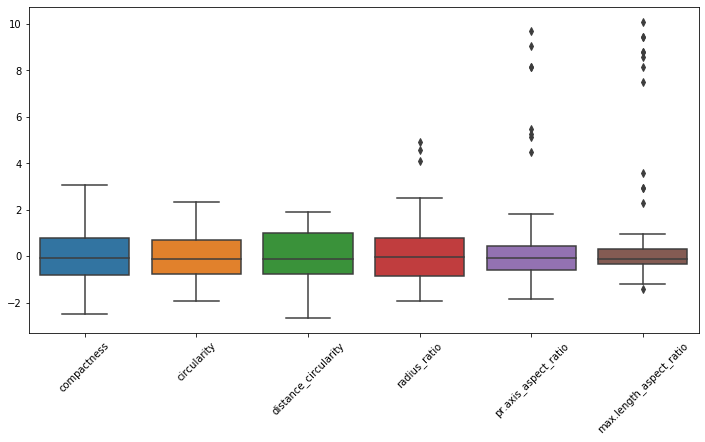

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=pca_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [24]:
from sklearn.impute import SimpleImputer

class OutliersImputer(SimpleImputer):
    '''
    This class extends the functionality of SimpleImputer to handle outliers.
    '''
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        super().__init__(strategy=strategy)

    def fit(self, X, y=None):
        for i in X.columns:
            q1, q2, q3 = X[i].quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = X[i] > q3 + 1.5*IQR
            b = X[i] < q1 - 1.5*IQR
            X[i] = np.where(a | b, np.NaN, X[i])  
        return super().fit(X, y)

In [25]:
pca_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'class'],
      dtype='object')

In [26]:
cols_for_outlier_treatment = ['radius_ratio','pr.axis_aspect_ratio', 'max.length_aspect_ratio']

pca_df[cols_for_outlier_treatment] = OutliersImputer().fit_transform(pca_df[cols_for_outlier_treatment])

# Model building

In [27]:
# Label encode target feature

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
pca_df['class'] = le.fit_transform(pca_df['class'])

In [28]:
# Split train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_df.drop('class', axis=1), 
                                                   pca_df['class'], 
                                                   test_size = 0.3, 
                                                   random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((592, 6), (254, 6), (592,), (254,))

In [29]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.9138513513513513
0.8818897637795275


# Hyper parameter tuning

In [31]:
C = [0.01, 0.05, 0.5, 1]
kernels = ['linear', 'rbf']

svc.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [32]:
param_grid = {
    'C' : C, 
    'kernel' : kernels
}

In [33]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

In [34]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.0s finished
/home/shrikant/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [35]:
grid_search.score(X_test, y_test)

0.8818897637795275

#### Observations

1. As seen above that we get a very high accuracy score with reduced dimentions.
2. This clearly means that our PCA analysis was successful